In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv")

In [87]:
df.head()

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


In [88]:
df['Status'] = df['Status'].replace({'Developing': 0, 'Developed': 1})
df.dtypes
y = np.array(df['Status']).reshape(-1,1)
x = np.array(df['Life_expectancy ']).reshape(-1,1)

In [89]:
x_train = x[:-30]
x_test =x[-30:]
y_train = y[:-30]
y_test = y[-30:]

In [90]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.3)

In [91]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm =confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


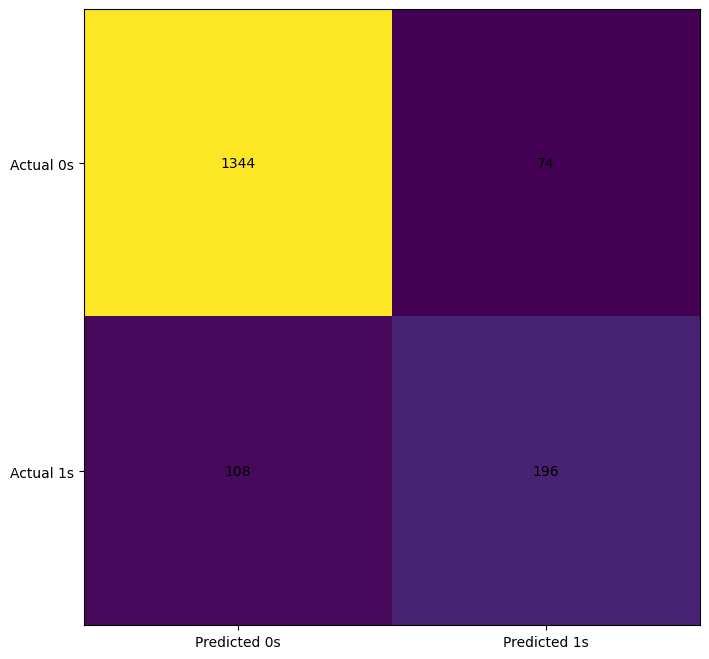

In [92]:
fig, ax = plt.subplots(figsize=(8, 8))
# imshow(cm) this will dispaly data as images
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))  # this will lables and give values for x axis bottom line is known as ticks
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))        # this will lables and give values for y axis left line is known as ticks
# To lable inside box using for loop one for column and one for Row
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='black')
plt.show()


In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1418
           1       0.73      0.64      0.68       304

    accuracy                           0.89      1722
   macro avg       0.83      0.80      0.81      1722
weighted avg       0.89      0.89      0.89      1722



In [94]:
model.score(y_test,y_pred)

0.8432055749128919

In [94]:
model.predict